In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/dataset_processed.csv')
data_encoded = pd.get_dummies(data)


data_encoded['target_class'] = pd.qcut(data_encoded['Specific capacity'], q=10, labels=False)
X = data_encoded.drop(['Specific capacity', 'target_class'], axis=1)
y = data_encoded['Specific capacity']
stratify_column = data_encoded['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=stratify_column)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train, X_test, y_train, y_test

(         O     N     B    S    P  Specific surface area  Pore volume  \
 484  15.55  2.61  0.00  0.0  0.0                3139.20        1.740   
 145   7.71  0.00  0.00  0.0  0.0                 804.00        0.315   
 491  15.55  2.61  0.00  0.0  0.0                3139.20        1.740   
 463   8.35  2.41  0.00  0.0  0.0                2511.00        2.170   
 216   4.89  1.74  0.00  0.0  0.0                1666.80        2.420   
 ..     ...   ...   ...  ...  ...                    ...          ...   
 460   8.35  2.41  0.00  0.0  0.0                2511.00        2.170   
 224   6.42  2.75  0.00  0.0  0.0                1301.60        3.040   
 375   3.37  0.00  0.00  0.0  0.0                3252.60        3.428   
 340   6.75  2.16  1.16  0.0  0.0                2363.18        1.330   
 124   9.64  3.44  0.00  0.0  0.0                1624.00        0.918   
 
           Dap  ID/IG  Active mass loading  ...  Electrolyte_3M Zn(CF3SO3)2  \
 484  2.217125  1.020                  1.0 

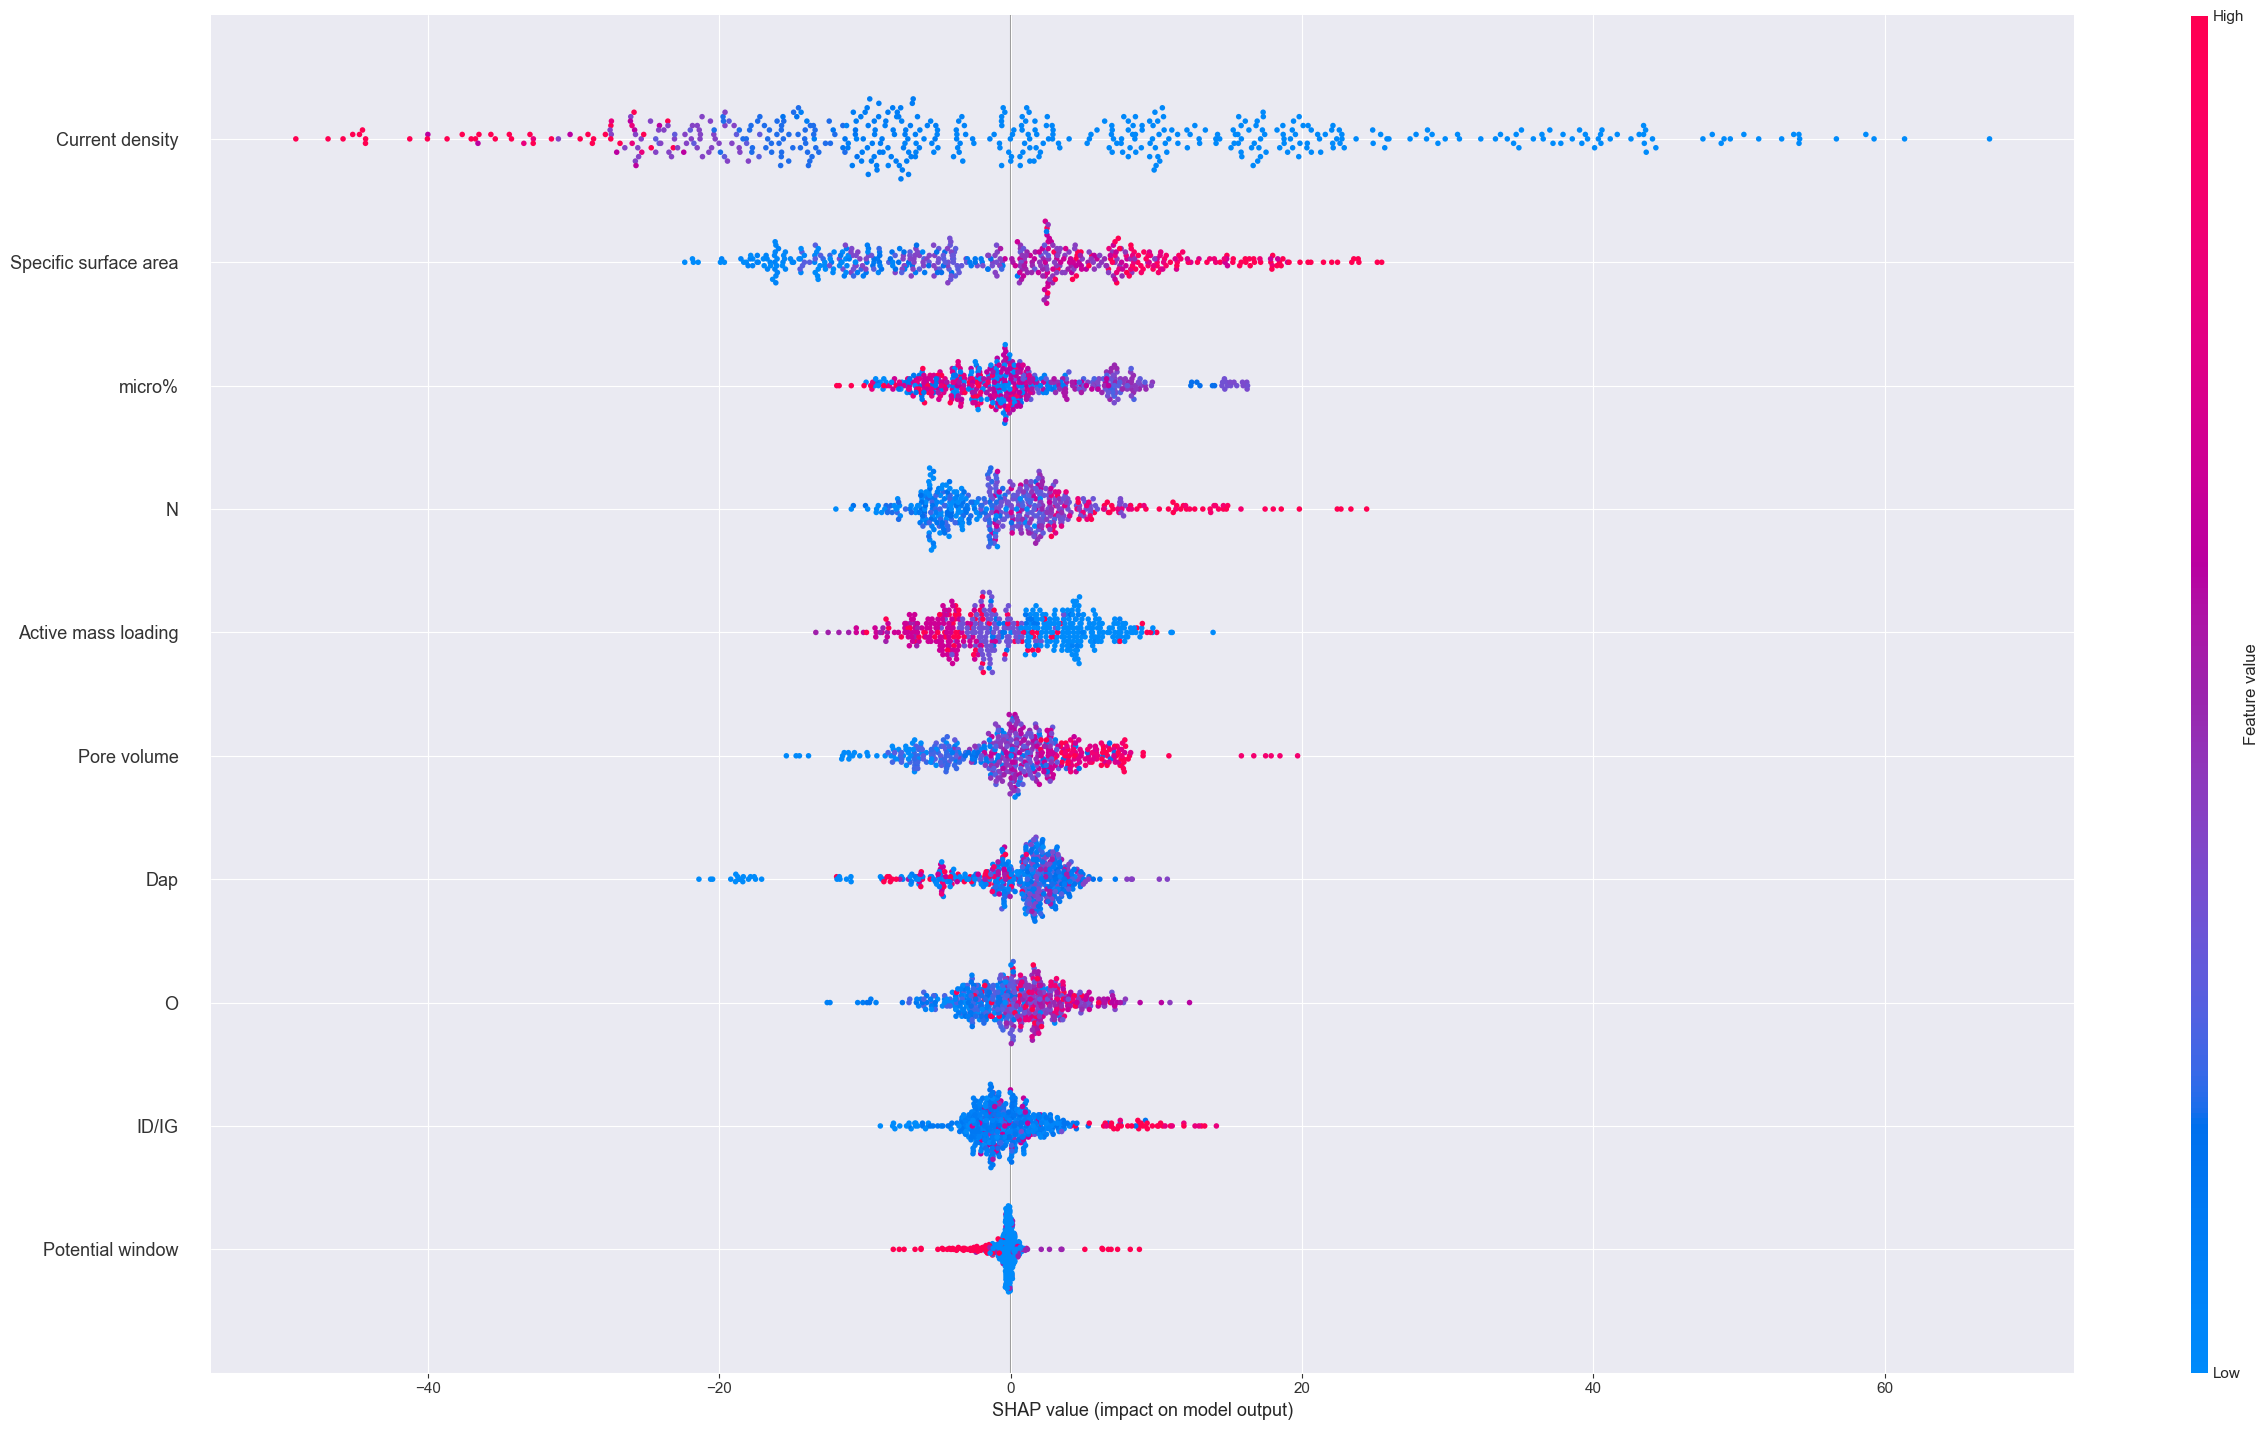

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
import shap
import matplotlib.pyplot as plt

gbr = GradientBoostingRegressor(n_estimators=80,
                                alpha=0.07,
                                learning_rate=0.14,
                                max_depth=9,
                                max_features=0.2,
                                min_samples_leaf=3,
                                min_samples_split=7,
                                subsample=0.8,
                                random_state=21)
gbr.fit(X_train, y_train)

y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

explainer = shap.Explainer(gbr)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar", plot_size=(25.6, 14.4), max_display=10, show=False)
plt.savefig('output/figures/shap_trainset_summary_bar.png')

# 清除当前图形
plt.clf()

shap.summary_plot(shap_values, X_train, plot_size=(25.6, 14.4), max_display=10, show=False)
plt.savefig('output/figures/shap_trainset_summary.png')

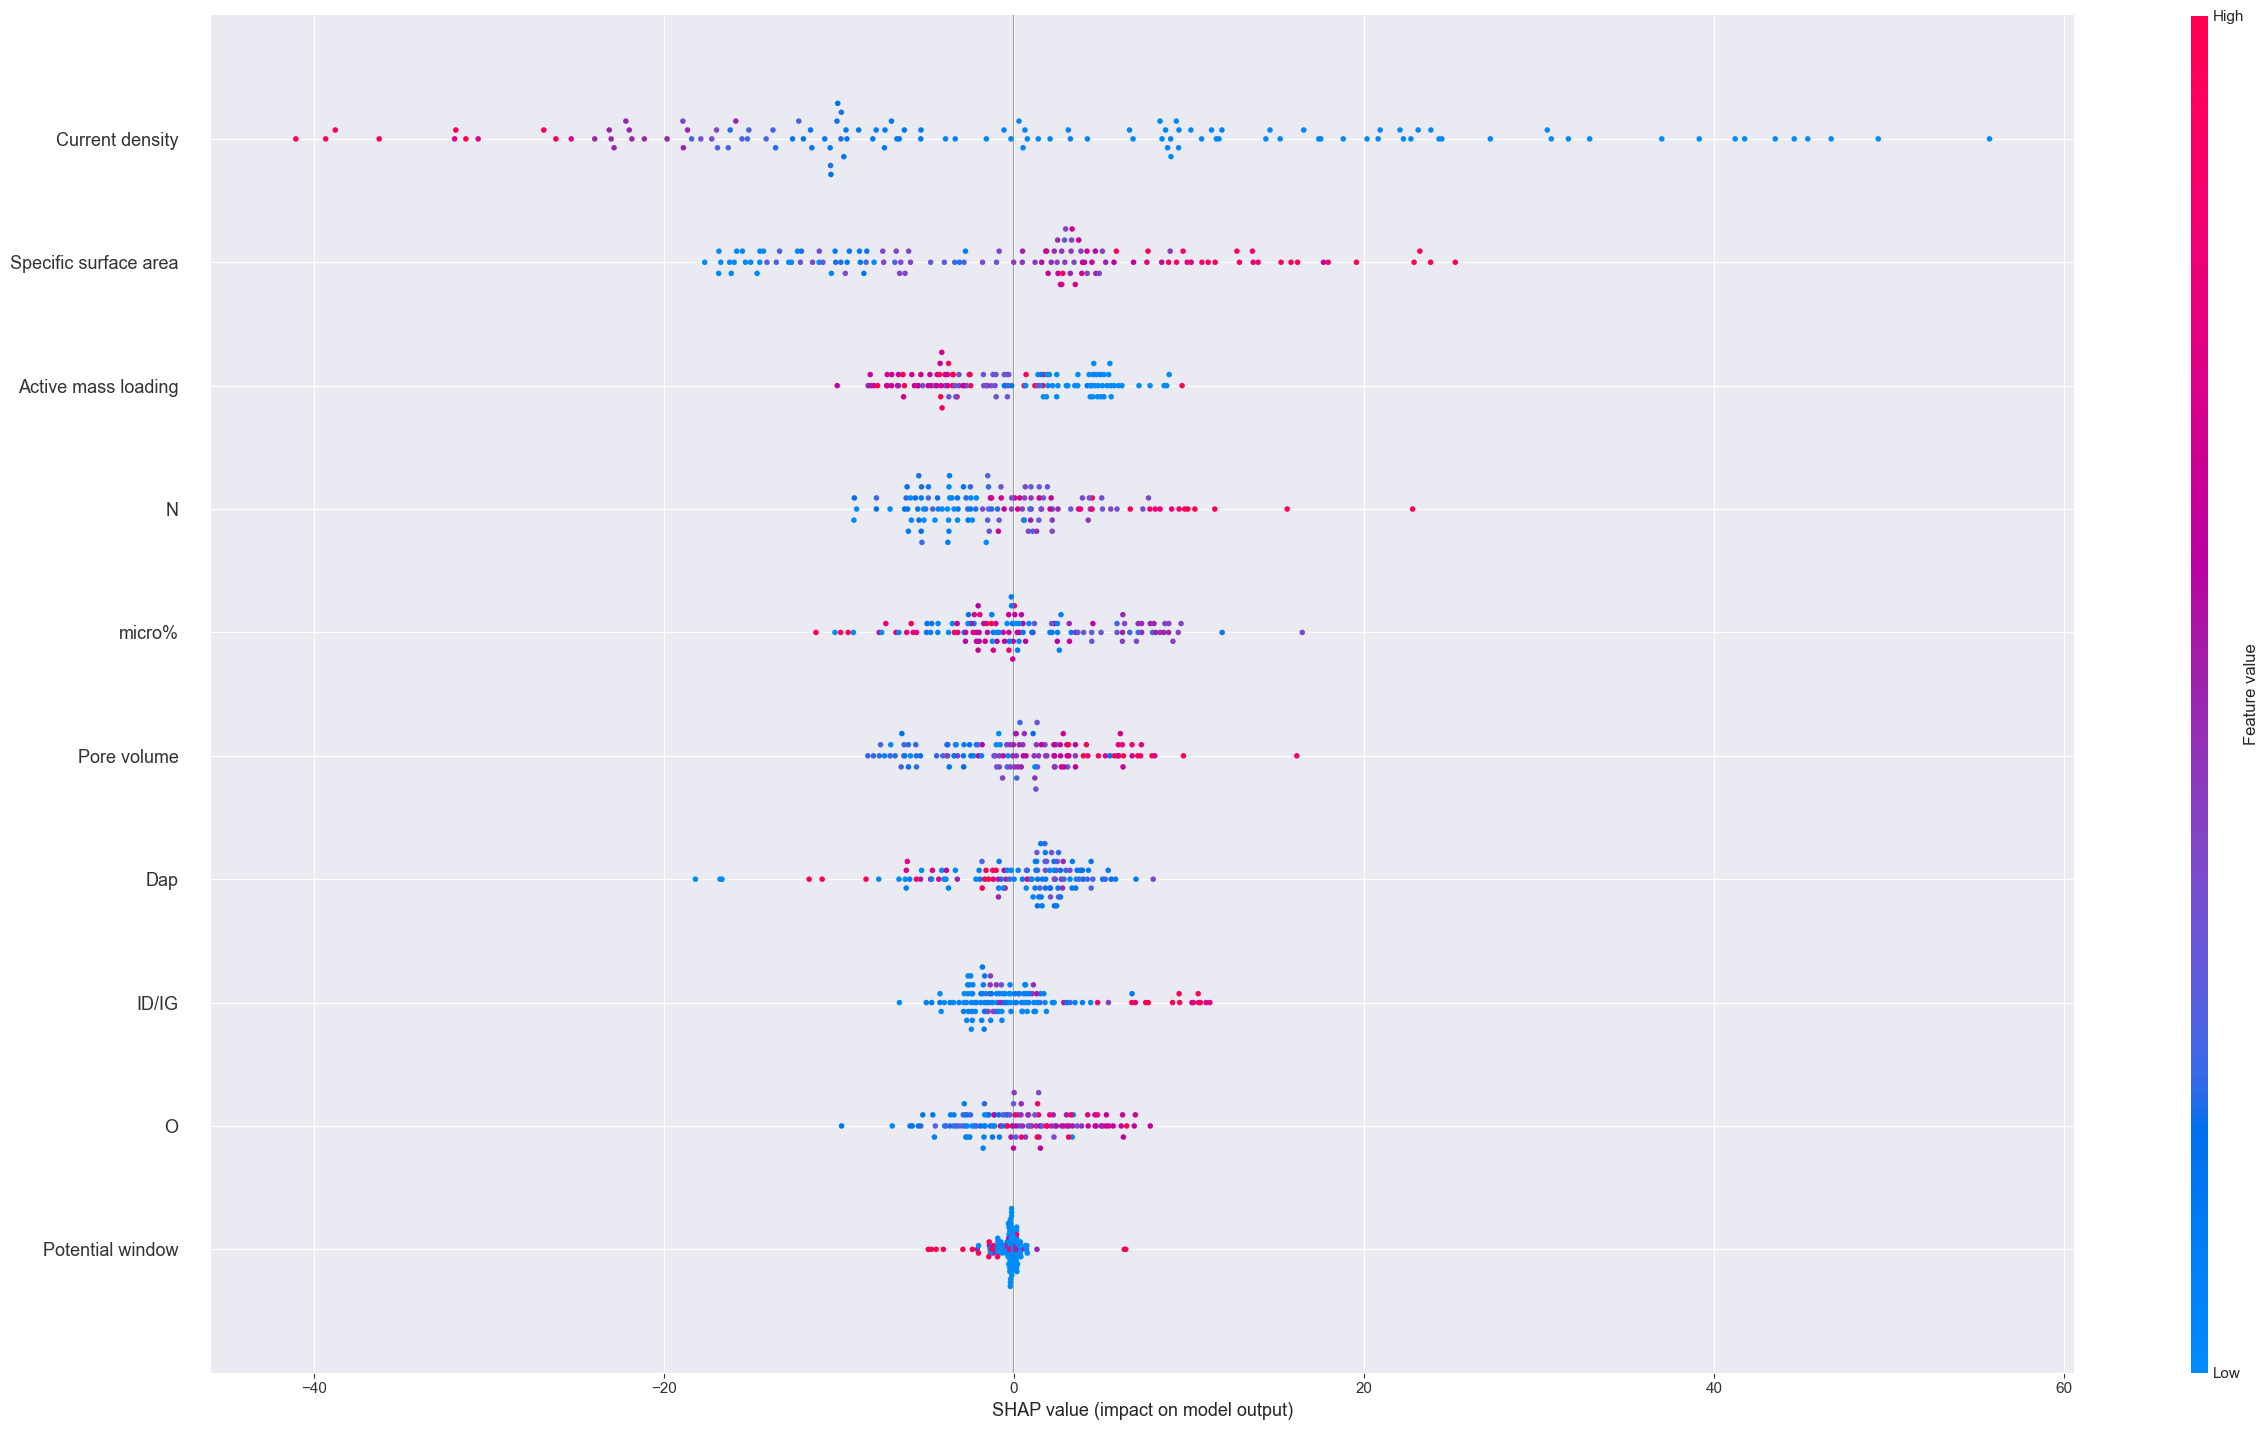

In [7]:
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=(25.6, 14.4), max_display=10, show=False)
plt.savefig('output/figures/shap_testset_summary_bar.png')

# 清除当前图形
plt.clf()

shap.summary_plot(shap_values, X_test, plot_size=(25.6, 14.4), max_display=10, show=False)
plt.savefig('output/figures/shap_testset_summary.png')